# Binary Classification Models
#### Comparing models with and without Principal Component Analysis
### By Brea Koenes

#### Data
This dataset contains attributes of mushrooms. Each row in the dataset is a mushroom, and the columns classify the features of that mushroom and the target variable (whether it is poisonous or not). 

#### Overview
I create 2 machine learning models that can predict if a mushroom is edible or poisonous. One model uses PCA to reduce dimensionality, and the first model does not—this is to compare accuracy. The models are both binary classification models, as the target variable is binary.

1. Load and rename data.

In [70]:
# Imports 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
# Read in dataset
df = pd.read_csv('agaricus-lepiota.csv',encoding='utf-8', header=None) 

# See all column names to rename them
print(df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')


In [72]:
# Rename columns based on .names file
df = df.rename(columns={0: 'poisonous', 1: 'cap-shape', 2: 'cap-surface', 3: 'cap-color', 4: 'bruises', 5: 'odor', 
                        6: 'gill-attachment', 7: 'gill-spacing', 8: 'gill-size', 9: 'gill-color', 10: 'stalk-shape', 
                        11: 'stalk-root', 12: 'stalk-surface-above-ring', 13: 'stalk-surface-below-ring', 
                        14: 'stalk-color-above-ring', 15: 'stalk-color-below-ring', 16: 'veil-type', 17: 'veil-color', 
                        18: 'ring-number', 19: 'ring-type', 20: 'spore-print-color', 21: 'population', 22: 'habitat'})

# Look at data
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2. Split the data into Train and Test sets.

In [73]:
# Seperate features and target variable
x = df.drop(columns=['poisonous']) # Features
y = df['poisonous'] # Target 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) # 80% train, 20% test

# Ensure they split correctly
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6499, 22)
(6499,)
(1625, 22)
(1625,)


3. One-Hot Encode the features and Label Encode the responses of the training data.

In [74]:
# One-Hot Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train = encoder.fit_transform(x_train)

# Label Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Encode the test set too, as both must be the same for training model part
x_test = encoder.transform(x_test)
y_test = label_encoder.transform(y_test)

# Ensure shape is correct
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6499, 116)
(6499,)
(1625, 116)
(1625,)


/opt/anaconda3/envs/dtsc680/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


4. Create a sequential neural network model for prediction on this data with an
input and output layer.

In [75]:
# Create the model
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))  # Input layer 
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification because target is binary)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

5. Train the model using the training data.

In [76]:
%%time

# Train the model
hist = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
204/204 [==============================] - 0s 513us/step - loss: 0.2926 - accuracy: 0.9117 - val_loss: 0.0913 - val_accuracy: 0.9852
Epoch 2/10
204/204 [==============================] - 0s 299us/step - loss: 0.0527 - accuracy: 0.9937 - val_loss: 0.0299 - val_accuracy: 0.9963
Epoch 3/10
204/204 [==============================] - 0s 289us/step - loss: 0.0191 - accuracy: 0.9983 - val_loss: 0.0140 - val_accuracy: 0.9982
Epoch 4/10
204/204 [==============================] - 0s 290us/step - loss: 0.0095 - accuracy: 0.9991 - val_loss: 0.0084 - val_accuracy: 0.9982
Epoch 5/10
204/204 [==============================] - 0s 286us/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 6/10
204/204 [==============================] - 0s 289us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/10
204/204 [==============================] - 0s 288us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy:

6. Use a Confusion Matrix to analyze the results of the network.

51/51 [==============================] - 0s 181us/step


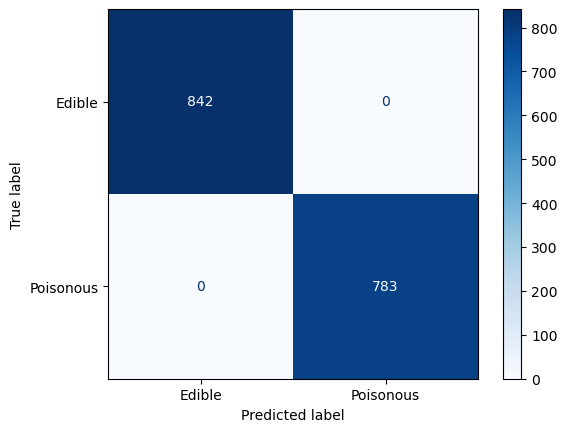

In [77]:
# Get raw probability predictions
y_pred_probs = model.predict(x_test)

# Convert probabilities to binary predictions to be compatible with confusion matrix
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Create Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"]) 
display.plot(cmap='Blues')
plt.show()

7. Perform dimensionality reduction using PCA, keeping 95% of the variance.

In [78]:
# Perform dimensionality reduction using PCA 
scaler = StandardScaler() # Scale data
x_train_pca = scaler.fit_transform(x_train)
x_test_pca = scaler.transform(x_test)

pca = PCA(n_components=0.95) # Keep 95% of the variance

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

8. Create and train a new neural network on the PCA’ed data.

In [79]:
# Create the model
model_pca = Sequential()
model_pca.add(Dense(32, input_dim=x_train_pca.shape[1], activation='relu'))  # Input layer
model_pca.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification because target is binary)

# Compile the model
model_pca.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
%%time

# Train the model
hist = model_pca.fit(x_train_pca, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test_pca, y_test),
                    verbose=1)

Epoch 1/10
204/204 [==============================] - 0s 512us/step - loss: 0.3235 - accuracy: 0.9203 - val_loss: 0.1322 - val_accuracy: 0.9822
Epoch 2/10
204/204 [==============================] - 0s 293us/step - loss: 0.0822 - accuracy: 0.9865 - val_loss: 0.0537 - val_accuracy: 0.9895
Epoch 3/10
204/204 [==============================] - 0s 285us/step - loss: 0.0383 - accuracy: 0.9937 - val_loss: 0.0315 - val_accuracy: 0.9963
Epoch 4/10
204/204 [==============================] - 0s 286us/step - loss: 0.0228 - accuracy: 0.9978 - val_loss: 0.0207 - val_accuracy: 0.9963
Epoch 5/10
204/204 [==============================] - 0s 286us/step - loss: 0.0150 - accuracy: 0.9985 - val_loss: 0.0146 - val_accuracy: 0.9963
Epoch 6/10
204/204 [==============================] - 0s 285us/step - loss: 0.0104 - accuracy: 0.9989 - val_loss: 0.0104 - val_accuracy: 0.9988
Epoch 7/10
204/204 [==============================] - 0s 285us/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.0077 - val_accuracy:

9. Use Confuction Matrix to analyze the results of the new
network.

51/51 [==============================] - 0s 169us/step


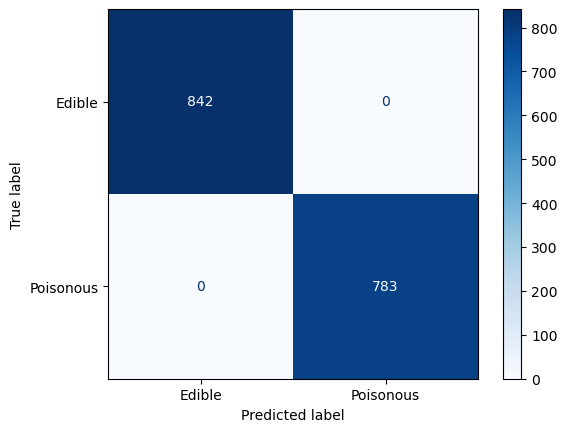

In [81]:
# Get raw probability predictions
y_pred_probs = model_pca.predict(x_test_pca)

# Convert probabilities to binary predictions to be compatible with confusion matrix
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Create Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"]) 
display.plot(cmap='Blues')
plt.show()

In [82]:
# Compare first model's params
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                1872      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compare seconds model's params
model_pca.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                1312      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


11. Export the PCA model.

In [84]:
model_pca.save('model_pca.h5')

#### Conclusion
The PCA model was able to achieve a comparable accuracy while using fewer features—which can improve efficiency and reduce overfitting risks. During PCA, redundant features are reduced and noise is removed. The PCA model was also a bit more computationally efficient, taking less time to train the model. 

If I was working with a dataset with a lot of noise and many columns, or one where I need to cut down training time, I would use PCA.